In [1]:
import pandas as pd
import numpy as np
import random
from time import time
import lightgbm as lgb
from lightgbm.sklearn import LGBMClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('X.csv')
X = pd.read_csv('default of credit card clients.csv')

In [3]:
data = data.drop('Unnamed: 0', axis = 1)
pay_ori = X.iloc[:,6:12]
data = pd.concat([data, pay_ori], axis = 1)

In [4]:
x_train = data.reset_index()

In [5]:
pay_tr = x_train.iloc[:,24:82]
x_train = x_train.drop(x_train.columns[24:82], axis = 1)

In [6]:
bill_train1 = np.array(x_train['BILL_AMT1'])
bill_train2 = np.array(x_train['BILL_AMT2'])
bill_train3 = np.array(x_train['BILL_AMT3'])
bill_train4 = np.array(x_train['BILL_AMT4'])
bill_train5 = np.array(x_train['BILL_AMT5'])
bill_train6 = np.array(x_train['BILL_AMT6'])

for i in range(len(x_train['BILL_AMT1'])):
    if bill_train1[i] >=0:
        bill_train1[i] = bill_train1[i]+1
        bill_train1[i] = np.log(bill_train1[i])
    else:
        bill_train1[i] = bill_train1[i]*(-1)
        bill_train1[i] = bill_train1[i]+1
        bill_train1[i] = np.log(bill_train1[i])
        bill_train1[i] = bill_train1[i]*(-1)
for i in range(len(x_train['BILL_AMT2'])):
    if bill_train2[i] >=0:
        bill_train2[i] = bill_train2[i]+1
        bill_train2[i] = np.log(bill_train2[i])
    else:
        bill_train2[i] = bill_train2[i]*(-1)
        bill_train2[i] = bill_train2[i]+1
        bill_train2[i] = np.log(bill_train2[i])
        bill_train2[i] = bill_train2[i]*(-1)
for i in range(len(x_train['BILL_AMT3'])):
    if bill_train3[i] >=0:
        bill_train3[i] = bill_train3[i]+1
        bill_train3[i] = np.log(bill_train3[i])
    else:
        bill_train3[i] = bill_train3[i]*(-1)
        bill_train3[i] = bill_train3[i]+1
        bill_train3[i] = np.log(bill_train3[i])
        bill_train3[i] = bill_train3[i]*(-1)
for i in range(len(x_train['BILL_AMT4'])):
    if bill_train4[i] >=0:
        bill_train4[i] = bill_train4[i]+1
        bill_train4[i] = np.log(bill_train4[i])
    else:
        bill_train4[i] = bill_train4[i]*(-1)
        bill_train4[i] = bill_train4[i]+1
        bill_train4[i] = np.log(bill_train4[i])
        bill_train4[i] = bill_train4[i]*(-1)
for i in range(len(x_train['BILL_AMT5'])):
    if bill_train5[i] >=0:
        bill_train5[i] = bill_train5[i]+1
        bill_train5[i] = np.log(bill_train5[i])
    else:
        bill_train5[i] = bill_train5[i]*(-1)
        bill_train5[i] = bill_train5[i]+1
        bill_train5[i] = np.log(bill_train5[i])
        bill_train5[i] = bill_train5[i]*(-1)
for i in range(len(x_train['BILL_AMT6'])):
    if bill_train6[i] >=0:
        bill_train6[i] = bill_train6[i]+1
        bill_train6[i] = np.log(bill_train6[i])
    else:
        bill_train6[i] = bill_train6[i]*(-1)
        bill_train6[i] = bill_train6[i]+1
        bill_train6[i] = np.log(bill_train6[i])
        bill_train6[i] = bill_train6[i]*(-1)

In [7]:
payamt_train1 = np.array(x_train['PAY_AMT1'])
payamt_train2 = np.array(x_train['PAY_AMT2'])
payamt_train3 = np.array(x_train['PAY_AMT3'])
payamt_train4 = np.array(x_train['PAY_AMT4'])
payamt_train5 = np.array(x_train['PAY_AMT5'])
payamt_train6 = np.array(x_train['PAY_AMT6'])
for i in range(len(x_train['PAY_AMT1'])):
        payamt_train1[i] = payamt_train1[i]+1
        payamt_train1[i] = np.log(payamt_train1[i])
for i in range(len(x_train['PAY_AMT2'])):
        payamt_train2[i] = payamt_train2[i]+1
        payamt_train2[i] = np.log(payamt_train2[i])
for i in range(len(x_train['PAY_AMT3'])):
        payamt_train3[i] = payamt_train3[i]+1
        payamt_train3[i] = np.log(payamt_train3[i])
for i in range(len(x_train['PAY_AMT4'])):
        payamt_train4[i] = payamt_train4[i]+1
        payamt_train4[i] = np.log(payamt_train4[i])
for i in range(len(x_train['PAY_AMT5'])):
        payamt_train5[i] = payamt_train5[i]+1
        payamt_train5[i] = np.log(payamt_train5[i])
for i in range(len(x_train['PAY_AMT6'])):
        payamt_train6[i] = payamt_train6[i]+1
        payamt_train6[i] = np.log(payamt_train6[i])

In [8]:
payamt_train1 = pd.DataFrame(payamt_train1, columns=['PAY_AMT1'])
payamt_train2 = pd.DataFrame(payamt_train2, columns=['PAY_AMT2'])
payamt_train3 = pd.DataFrame(payamt_train3, columns=['PAY_AMT3'])
payamt_train4 = pd.DataFrame(payamt_train4, columns=['PAY_AMT4'])
payamt_train5 = pd.DataFrame(payamt_train5, columns=['PAY_AMT5'])
payamt_train6 = pd.DataFrame(payamt_train6, columns=['PAY_AMT6'])

bill_train1 = pd.DataFrame(bill_train1, columns=['BILL_AMT1'])
bill_train2 = pd.DataFrame(bill_train2, columns=['BILL_AMT2'])
bill_train3 = pd.DataFrame(bill_train3, columns=['BILL_AMT3'])
bill_train4 = pd.DataFrame(bill_train4, columns=['BILL_AMT4'])
bill_train5 = pd.DataFrame(bill_train5, columns=['BILL_AMT5'])
bill_train6 = pd.DataFrame(bill_train6, columns=['BILL_AMT6'])

In [9]:
x_train = x_train.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis = 1)

In [10]:
x_train['LIMIT_BAL'] = x_train['LIMIT_BAL'].apply(np.log)

In [11]:
x_train = x_train.drop(['index'], axis = 1)

In [12]:
x_train = pd.concat([x_train, pay_tr, bill_train1, bill_train2, bill_train3, bill_train4, bill_train5, bill_train6,
                     payamt_train1, payamt_train2, payamt_train3, payamt_train4, payamt_train5, payamt_train6], axis = 1)

In [13]:
x_train = x_train.drop(['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis = 1)

In [14]:
y_train = X[['default.payment.next.month']]

In [35]:
param ={'objective':'binary','metric':'auc',
                                    'learning rate':0.05,
                                    'num_leaves':40,
                                    'max_depth':11,
                                    'feature_fraction':0.95,
                                    'bagging_fraction':0.9,
       'colsample_bytree':0.7,
       'lambda_l1':4,
       'lambda_l2':1,
       #'min_split_gain':0.05,
       'min_child_weight':1
       }
train_data = lgb.Dataset(x_train,label=y_train['default.payment.next.month'])
bst=lgb.cv(param,train_data,num_boost_round=1000,nfold=5,stratified=False,shuffle=True,early_stopping_rounds=50,verbose_eval=50,show_stdv=True)
print('best n_estimators',len(bst['auc-mean']))
print('best cv score',bst['auc-mean'][-1])

[50]	cv_agg's auc: 0.782087 + 0.00563478
[100]	cv_agg's auc: 0.780001 + 0.00495809
best n_estimators 51
best cv score 0.7820990734635046


In [36]:
litegb =lgb.train(param,train_data,num_boost_round=len(bst['auc-mean']))
y_proba_train =litegb.predict(x_train)

y_pred_train=[]
for i in y_proba_train:
    if i>0.15:
        y_pred_train.append(1)
    else:
        y_pred_train.append(0)
#va1=round(value_added(y_train,y_pred_train),4)
#va2=round(value_added(y_test,y_pred),4)
tn1,fp1,fn1,tp1 = confusion_matrix(y_train,y_pred_train).ravel()
pre1 = round(metrics.precision_score(y_train,y_pred_train),4)
rec1 = round(metrics.recall_score(y_train,y_pred_train),4)
acc1 = round(metrics.accuracy_score(y_train,y_pred_train),4)
f1_1 = round(metrics.f1_score(y_train,y_pred_train),4)
auc1 = round(metrics.roc_auc_score(y_train,y_pred_train),4)

print('Accuracy1:',acc1,"\nPrecision1:",pre1,"\nRecall1:",rec1,"\nF1_1:",f1_1,"\nAUC(train):",auc1)

Accuracy1: 0.662 
Precision1: 0.3792 
Recall1: 0.8287 
F1_1: 0.5203 
AUC(train): 0.7217


In [17]:
classifier = LogisticRegression(C=1000, solver='liblinear', penalty='l2', random_state = None)  
classifier.fit(x_train, y_train) 

C:\Users\Tomy\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

true_y==1 :6636
pred_y==1 :3455
Accuracy: 0.8214
Precision: 0.6851
Recall: 0.3567
f1-score: 0.4691
AUC:0.7766


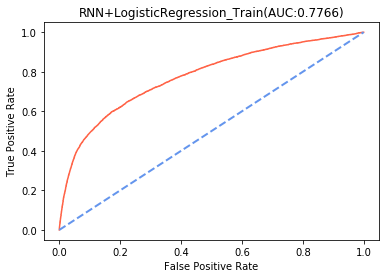

In [18]:
y_pred=classifier.predict(x_train)
y_proba=classifier.predict_proba(x_train)[:,1]
print('true_y==1 :'+str(np.count_nonzero(y_train)))
print('pred_y==1 :'+str(len(y_pred[y_pred==1])))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba, pos_label=1)
AUC =round(auc(fpr, tpr),4)
#print('AUC:'+str(AUC))
print("Accuracy:",round(metrics.accuracy_score(y_train, y_pred),4))
print("Precision:",round(metrics.precision_score(y_train, y_pred),4))
print("Recall:",round(metrics.recall_score(y_train, y_pred),4))
print("f1-score:",round(metrics.f1_score(y_train, y_pred),4))
print('AUC:'+str(AUC))
plt.plot(fpr,tpr,color='tomato')
plt.plot([0,1],[0,1],color='cornflowerblue',lw=2, linestyle='--')
plt.title('RNN+LogisticRegression'+'_Train(AUC:'+str(AUC)+')')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()